<a id='top'></a>

# CSCI3022 S21
# Homework 5: Testing and Confidence
***

**Name**: Chirag Telang

***

This assignment is due on Canvas by **MIDNIGHT on Friday, April 8**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- Any relevant data sets should be available on Canvas. To make life easier on the graders if they need to run your code, do not change the relative path names here. Instead, move the files around on your computer.
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Here is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked on Canvas on writing math in Markdown. **All** of your written commentary, justifications and mathematical work should be in Markdown.  I also recommend the [wikibook](https://en.wikibooks.org/wiki/LaTeX) for LaTex.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do **Kernel $\rightarrow$ Restart & Run All** as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- 95 points of this assignment are in problems.  The remaining 5 are for neatness, style, and overall exposition of both code and text.
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Problem 3](#p3) |
---

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import scipy.stats as stats
%matplotlib inline

<br>

---
<a/ id='p1'></a>
[Back to top](#top)
## [15 points] Problem 1 - Time and Testing 

The flowers bloomed early this year in Kyoto, Japan (see: [Washington Post](https://www.washingtonpost.com/weather/2021/03/29/japan-kyoto-cherry-blossoms-record/))  Does this mean anything?


**Part A**: Load in the data set in `kyotoflowers.csv`, a UTF-8 encoded CSV file.  The file contains two columns (with a header).

- `AD`. : Year in Gregorian calendar (Year)
- `Full-flowering date (DOY)` : Full-flowering date in Gregorian calendar (FuFD)

Citations:
Full-flowering Dates of Prunus jamasakura in Kyoto City (Plain Text Version)
(for 9th to 14th centuries: Aono and Saito, 2010; Int. J. Biometeorol.,54, 211-219)
(for 15th to 21st centuries: Aono and Kazui, 2008; Int. J. Climatol., 28, 905-914)

Begin with a **Histogram** of the data.  Label axes and choose an appropriate number of bins.  Does this data appear to be approximately normally distributed?

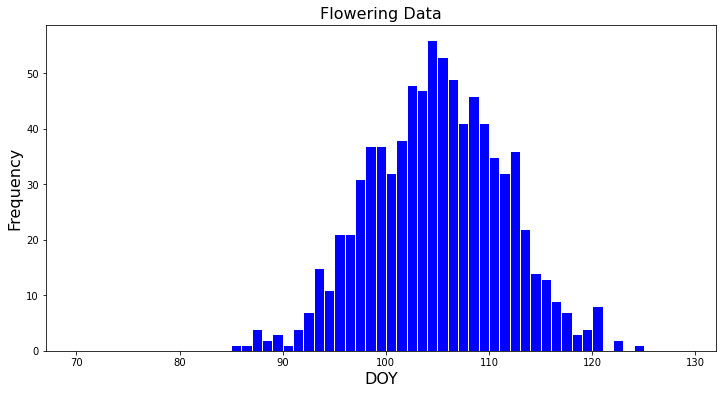

In [21]:
df=pd.read_csv('kyotoflowers.csv', encoding='UTF-8')
my_bins = range(70,130,1)
df_notNull = df.dropna()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
df_notNull.hist(column="Full-flowering date (DOY)", bins=my_bins, color="blue", edgecolor="white", ax=ax)
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_title("Flowering Data", fontsize=16)
ax.set_xlabel("DOY", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16);

**Part B**:Create a line plot where `Year` is the horizontal axis and `FuFD`is the vertical axis.  Do there *visually* appear to be any patterns?

<AxesSubplot:xlabel='AD'>

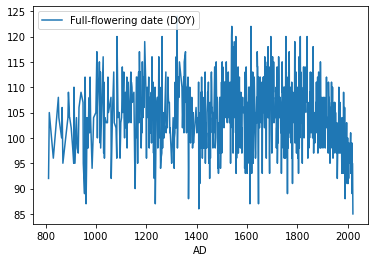

In [8]:
df_notNull.plot.line(x = 'AD', y = 'Full-flowering date (DOY)')

Yes, visually there is a pattern.

**Part C**: Print out a Tukey five-number summary for the set of full-flowering dates, as well as its mean and standard deviation.

In [9]:
print(df_notNull.describe())

                AD  Full-flowering date (DOY)
count   833.000000                 833.000000
mean   1552.224490                 104.453782
std     305.645618                   6.476146
min     812.000000                  85.000000
25%    1329.000000                 100.000000
50%    1586.000000                 104.000000
75%    1808.000000                 109.000000
max    2021.000000                 124.000000


**Part D**: Suppose we wish to approach the question: is the flowering date becoming *earlier*?  One way to do this might be to generate confidence intervals comparing e.g. the last $n$ years of data to all the years that came before them and ask if they're coming from distributions with the same *means*.

Suppose we take the most recent 12 years of take, from 2010-2021.  What is the mean full-flowering date for those years?  Perform a hypothesis test at $\alpha=0.01$ testing whether or not the mean from this interval is the same as the mean for the prior all-observed years.

Write a sentence interpreting this result.

**Note:** there are a lot of missing observations, especially for centuries ago. Make sure you're properly not including these in any variance/confidence/etc. calculations.

In [20]:
data2010 = df[1209 : 1221]
totalMean = np.mean(df_notNull["Full-flowering date (DOY)"])
sampleMean = np.mean(data2010["Full-flowering date (DOY)"])
print("Mean (2010-2021):",sampleMean, "\n")

totalStd = np.std(df_notNull["Full-flowering date (DOY)"], ddof = 1)
sampleStd = np.std(data2010["Full-flowering date (DOY)"], ddof = 1)

denominator = np.sqrt(((totalStd ** 2) / 833) + ((sampleStd ** 2) / 12))
tVal = ((totalMean - sampleMean)/ denominator)
pVal = stats.t.cdf(x = tVal, df = 11)
print("stats =" ,tVal)
print("p-value =", pVal)

Mean (2010-2021): 94.16666666666667 

stats = 7.962708035834203
p-value = 0.9999965856140111


The mean of the interval that contains all the years is higher than the mean flowering date -- suggesting that as time passes, flowers are flowering earlier. Based on the p-value calculated, the null hypothesis would be accepted and the alternative hypothesis would be rejected.

**Part E**: Was the test in part D appropriate to answer a broad question like "does the full flowering data reflect the presence of global warming?"  What tests could we have run instead?

Yes, the test in part D is an appropriate answer because the flowering dates are earlier. Instead, we could have run a Z test or a confidence interval.

**Part F**: We should have rejected the null hypothesis in Part D.  But sometimes, people do some shifty things with data.  And we could, too!  One way to be statistically disingenuous is known as $p$-fishing or $p$-hacking.  This process represent the idea of "cherry-picking" through our data to find *subsets* of the data that most support a desired conclusion.

Suppose we - for whatever reason - really wish to use this data set to come to the conclusion that "there is no difference in full flowering datas between now and the past."  To support this conclusion, we devise the following idea:

- Consider *every single* list of 12 consecutive years in the data set, starting with 1600-1611, then 1601-1612, then 1602-1613.
- For *each* one of those 12-year intervals, generate the 99% confidence interval for the difference in the mean `FuFD`  over  those 12 years' to the mean from most recent 12 years from 2010-2021.

From that list of confidence intervals, print out a list of every starting year for an interval that contains zero. (e.g if the confidence interval for comparing 1618-1629 to 2010-2021 contains zero, then print `1618`.  Report:
- The earliest date of such an interval contianing zero.
- The latest date where such an interval **does not** contain zero.

Then write two sentences of how you could interpret those two results to conclude *either* that the flowering dates are getting earlier **or** that they are not getting earlier.

In [19]:
t = stats.t.ppf(0.99, 12)
tempArr = []
tempArr2 = []

for i in range(0,411):
    newSample = df[799+i: 811+i]
    finalMean = np.mean(newSample["Full-flowering date (DOY)"]) - sampleMean
    output = finalMean + (t * denom)
    output2 = finalMean - (t * denom)
    tempArr.append([output,output2])
    if -1 < output < 1 or -1 < output2 < 1:
        tempArr2.append(1600+i)
        
print("The earliest date of such an interval containing zero:", tempArr2[0])
print("The latest date where such an interval does not contain zero:", tempArr2[len(tempArr2)-1] + 1)


The earliest date of such an interval containing zero: 1971
The latest date where such an interval does not contain zero: 1987


One could conclude that the flowering dates are getting earlier by saying that the mean flowering date is lower than the interval of all the years. In contrast, one could argue that they are not getting earlier because the dates are relatively close to eachother. 

<br>

---
<a/ id='p2'></a>
[Back to top](#top)
## [15 points] Problem 2: Testing and CI Theories; quick problems


#### 2A (5 pts):
Ready the article at the following link: https://tinyurl.com/y6sxe9n8.

(If you have issues, log into the CU-libraries page, and search for the article "The Proposal to Lower P Value Thresholds to .005," by John P. A. Ioannidis from JAMA 2018.)


Then summarize it briefly (4-5 sentences), making sure you also answer the following: in what ways are scientists misusing p-values? Do you agree with the suggestion made in this article? What other suggestions are being made to
use them properly?


This article discusses how scientists are not only misrepresenting p-values, but how they are also drawing false conclusions that are then shared. One example of how scientists are misusing p-values is that they take the literal value and then use it to support the accuracy of the null hypothesis -- without giving any mention to the validity of the null hypothesis itself. To combat this, the author suggests that people can reduce the chance of incorrectness by changing the current p-value threshold from 0.05 to 0.005. In regards to the suggestion made in the article, I do agree with it -- as lowering the threshold would result in a stricter acceptance guidline across the scientific community.

#### 2B  (2 pts):
In general, which is wider: a 95% confidence interval or a 99% confidence interval? How would you explain this to your younger sibling, who is not a statistician?   Use **plain English**.

In general, a 99% confidence interval is wider because the value being searched for in a data set will be in that interval 99% of the time as opposed to 95% of the time. Therefore, this interval would be considered to be wider.


#### 2C (2pts):

If you're doing quality control for the average strength of carbon fiber that will be used in airplane construction, and your alternative hypothesis is that the strength of the carbon is below tolerance, and therefore unsafe, would you rather have a low Type I error rate or a low Type II error rate?   **Justify** your answer in complete English sentences.

Knowing that Type II errors are given in regards to false negatives, in the case of airplane quality, we would much rather have false positives and avoid false negatives. Therefore, we would much rather have a low Type II error rate -- so we don't have to deal with unexpected issues. 


#### 2D (2pts):

Let $X_1, X_2, \dots X_n$ be independent and identically distributed sample from a normal random variable $N(\mu,1)$.


As you've seen, A 95% confidence interval for $\mu$ is $\bar{x} \pm 1.96 \cdot \frac{1}{\sqrt{n}}$.

Let $p$ denote the probability that an *additional* (or new) independent observation falls within this confidence interval. Is $p$ greater than, less than, or equal to 0.95? Justify your answer with both intuition and a formal mathematical statement.

$p = P(\bar{X} - \frac{1.96}{\sqrt{n}} \le X_{n+1} \le \bar{X}_n + \frac{1.96}{\sqrt{n}}) = P(-\frac{1.96}{\sqrt{n}} < X_{n+1} - \bar{X} < \frac{1.96}{\sqrt{n}}) \\ = P(-\frac{1.96}{\sqrt{n+1}} < \frac{\sqrt{n(X_{n+1} - \bar{X})}}{\sqrt{n+1}} < \frac{1.96}{\sqrt{n+1}}) \\ = P(-\frac{1.96}{\sqrt{n+1}} < Z < \frac{1.96}{\sqrt{n+1}}) < 0.95$

p is less than 0.95, because the given confidence interval is for theta (θ), which is the population mean. The next observation will be based on the population distribution -- which will be less than 0.95. 

#### 2E (2pts):
Suppose that 14 people in a sample of 91 are found to be smokers. Calculate the 90% confidence interval
for the *true* proportion of smokers in the population from which this sample originated. Interpret this interval in a plain English sentence.

***
Here, we have $p = 14/91 = 0.154$. For the 90% confidence interval, we use $z = 1.64$. The margin of error is $1.64\sqrt{\frac{0.154(1-0.154)}{91}} = 0.062$. So, the 90% confidenece interval is $0.154 \pm 0.062$ or $[0.092,0.216]$.

#### 2F (2pts):
In an 1881 study Michelson and Newcomb measured the time light took to travel 7400
meters. Inspecting their study and the descriptions of their 64 measurements, it is reasonable to assume that the data were iid.  Their measurements contained sample statistics in $\mu s$ (or $\frac{sec}{10^6}$) of **mean** $\bar{X}=27.75$ and **standard deviation** of $s = 5.08.$


Construct an approximate 95% confidence interval for the time light takes to travel 7400 meters.

In [13]:
stats.t.interval(alpha=0.95, df=63, loc= 27.75, scale=5.08)

(17.598430047797244, 37.901569952202756)

---

<a id='p3'></a>
[Back to top](#top)

### [15 points] Problem 3 - Nap time?


It is estimated that [about 75% of adults](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4997286/) in the United States drink coffee. Often, coffee is used to replace the need for sleep. It works alright, or so we think. Let's find out, in this exciting homework problem!

[One recent study](https://www.sciencedirect.com/science/article/pii/S1388245703002554) investigated the effects of drinking coffee, taking a nap, and having a ["coffee-nap"](https://lifehacker.com/naps-vs-coffee-which-is-better-when-youre-exhausted-1730643671) - the practice of drinking some coffee *and then* having a short nap. The study broke participants up into three groups of 15 participants each, where the groups would have a nap, or have a coffee, or have a coffee-nap, then perform a task where their reaction time was measured. In previous experiments the mean reaction time measurement was found to be normally distributed. The reaction time means (milliseconds, ms) and standard deviations for the three groups of participants are given in the table below.

$$
\begin{array}{c|c|c|c}
\textrm{Group} & \textrm{Sample Size} & \textrm{Mean} & \textrm{Standard Deviation} \\
\hline 
\textrm{Coffee+Nap} & 15 & 451.3 & 31.9 \\ 
\textrm{Coffee} & 15 & 494.2 & 39.6 \\ 
\textrm{Nap} & 15 & 492.8 & 45.2 \\ 
\end{array}
$$

**Part A**: Compute a 97.5% t-confidence interval for the mean reaction time measurement for participants in each of these three groups. (You should find three separate confidence intervals.) Report the results.

1. Can you make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times?
2. Why did we use a t-distribution?

In [23]:
alpha =  0.025  


#compute CI for Coffee+Nap
xbar, s, n = 451.3, 31.9, 15
tVal = stats.t.ppf(1-alpha/2, n-1)
lowerBound = xbar - tVal * (s/np.sqrt(n))
upperBound = xbar + tVal * (s/np.sqrt(n))
print("CI for Coffee and Nap = [{:0.3f} , {:0.3f}]".format(lowerBound, upperBound))

#Compute CI for Coffee
xbar, s, n = 494.2, 39.6, 15
lowerBound = xbar - tVal *(s/np.sqrt(n))
upperBound = xbar + tVal *(s/np.sqrt(n))
print("CI for Coffee = [{:.03f}, {:.03f}]".format(lowerBound, upperBound))

#Compute CI for Nap
xbar, s, n = 492.8, 45.2, 15
lowerBound = xbar - tVal *(s/np.sqrt(n))
upperBound = xbar + tVal *(s/np.sqrt(n))
print("CI for Nap = [{:.03f}, {:.03f}]".format(lowerBound, upperBound))


CI for Coffee and Nap = [430.630 , 471.970]
CI for Coffee = [468.540, 519.860]
CI for Nap = [463.512, 522.088]


***
1. No, we cant make any conclusions regarding whether coffee, naps or both (coffee-naps) are better for faster reaction times because the confidence intervals overlap.

2. We used a t-distribution because our sample size is relatively small (less than 30).

**Part B**: Use an appropriate hypothesis test to determine if there sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a nap promotes faster reaction time than drinking coffee.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

***
I will be doing a hypothesis test for the difference between the means, where: $\\ \mu_{nap} = \text{nap}, \mu_{coffee} = \text{drinking coffee} \\ H_0: \mu_{nap} - \mu_{coffee} = 0 \\  H_1: \mu_{nap} - \mu_{coffee} > 0$


***
Using this test, the conclusion is made by the test statistic: $\\ T = \frac{\bar{x}_{nap} - \bar{x}_{coffee}}{\sqrt{\frac{s^2_N}{n_N} + \frac{s^2_C}{n_C}}}$
where C is coffee and N is nap.

In [25]:
xbar, sx, nx = 494.2, 39.6, 15 
ybar, sy, ny = 492.8, 45.2, 15  
# calc diff of means
diff = xbar - ybar 
denominator = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = diff / denominator

pval = 1 - stats.t.cdf(T, nx + ny - 2) 
print("Test Statistic = {:.3f}".format(T))
print("p-value = {:.3f}".format(pval))

Test Statistic = 0.090
p-value = 0.464


From our results, we see that our p-value is greater than our alpha of 0.025. Because of this, we can't reject the null and, as a result, conclude that we have insufficient evidence to claim that taking a nap promotes better reaction time than coffee.

**Part C**: Use an appropriate hypothesis test to determine if there is sufficient evidence, at the $\alpha = 0.025$ significance level, to conclude that taking a coffee-nap promotes faster reaction time than only drinking coffee, or only having a nap.  Be sure to clearly explain the test that you're doing and state all hypotheses. Do all computations in Python, and report results.

In [26]:
# coffee-nap versus coffee
xbar, sx, nx = 494.2, 39.6, 15 # coffee
ybar, sy, ny = 451.3, 31.9, 15 # coffee-nap
# calc diff of means
diff = xbar - ybar
denominator = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = diff / denominator

pval = 1 - stats.t.cdf(T, nx + ny - 2)
print("Test Statistic = {:.3f}".format(T))
print("p-value = {:.3f}".format(pval))

Test Statistic = 3.267
p-value = 0.001


***
Using this test, the conclusion is made by the test statistic: $\\ T = \frac{\bar{x}_{coffee} - \bar{x}_{coffeeNap}}{\sqrt{\frac{s^2_N}{n_N} + \frac{s^2_C}{n_C}}}$
where C is coffee and N is nap.

From our results, we see that our p-value is lower than our alpha of 0.025. Because of this, we reject the null and, as a result, conclude that we have sufficient evidence to claim that coffee naps promote better reaction time than coffee.

In [27]:
# coffee-nap versus nap
xbar, sx, nx = 492.8, 45.2, 1 
ybar, sy, ny = 451.3, 31.9, 15 
# calc diff of means
diff = xbar - ybar 
denominator = np.sqrt((sx**2)/nx + (sy**2)/ny)
T = diff / denominator

pval = 1 - stats.t.cdf(T, nx + ny - 2) 
print("Test Statistic = {:.3f}".format(T))
print("p-value = {:.3f}".format(pval))

Test Statistic = 0.903
p-value = 0.191


***
Using this test, the conclusion is made by the test statistic: $\\ T = \frac{\bar{x}_{nap} - \bar{x}_{coffee}}{\sqrt{\frac{s^2_N}{n_N} + \frac{s^2_C}{n_C}}}$
where C is coffee and N is nap.

From our results, we see that our p-value is greater than our alpha of 0.025. Because of this, we can't reject the null and, as a result, conclude that we have insufficient evidence to claim that taking a nap promotes better reaction time than coffee naps.

**Part D**: Generally speaking, we use $\alpha$ to denote the "probability of error if the null hypothesis is true."  In parts B-C, we performed three hypothesis tests.  Suppost that each of these tests is **independent**, with underlying Probability of type I error of $\alpha=0.025$.  What's the probability that we committed *at least one* Type I error over those 3 tests?  Why might this be important?

In [2]:
def typeOneProb(testNum, alpha):
    tempNum = 1 - alpha
    newProb = (tempNum)**(testNum)
    finalProb = 1 - newProb
    return finalProb

typeOneProb(3, 0.025)
    
    

0.07314062500000007

***
The probability that we committed at least one Type I error over those 3 tests is 0.0731. This is important because not only is it a higher probability than the Type 1 error probablity of a single test, but it also suggests that our results have a greater probability of being inaccurate.  